In [1]:
%pwd

'/panfs/jay/groups/15/jusun/dever120/Constrained-Deep-Learning-Survey/notebooks'

In [2]:
%cd ..

/panfs/jay/groups/15/jusun/dever120/Constrained-Deep-Learning-Survey


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Fairlearn Experiments

One of the packages we wanted to evaluate for our constrained deep learning survey is the `fairlearn` package that has the goal of using contraints to train a more fair. model. The code saves the results as a `.npz` file with the following keys:

-  diff: This is the difference of the MSE of the two groups, male and female. It is recorded at the end of each epoch during training for train and test splits.
-  f: f is the objective function value during training for train and test splits.
-  accuracy_diff: `accuracy_diff` is the difference of accuracies between the two groups, male and female. This is recorded at the end of each epoch during training for train and test splits.
- accuracy: The overall accuracy recorded during training for train and test splits

In [4]:
data_dir = '/home/jusun/dever120/Constrained-Deep-Learning-Survey/data/fairlearn_results_0.005.npz'
fairlearn_data = np.load(data_dir)

In [5]:
fairlearn_data.keys()

KeysView(NpzFile '/home/jusun/dever120/Constrained-Deep-Learning-Survey/data/fairlearn_results_0.005.npz' with keys: diff, f, accuracy_diff, accuracy)

# Load all of the data as dataframes

The first thing we will do for plotting is load the data as dataframes.

In [6]:
# diff / constraint
constraint_df = pd.DataFrame(fairlearn_data['diff'], columns=['train', 'test'])

# accuracy disparity
acc_disp_df = pd.DataFrame(fairlearn_data['accuracy_diff'], columns=['train', 'test'])

# objective function
obj_df = pd.DataFrame(fairlearn_data['f'], columns=['train', 'test'])

# accuracy
acc_df = pd.DataFrame(fairlearn_data['accuracy'], columns=['train', 'test'])

# Plotting the results

We will keep the plotting of the results consistent with other plots we have encountred in this project so far. Each experiment has an `r` value, that is the value on the constraint during training, so we will have difference plots for difference values of `r`. This notebook just shows how to interact with the data.

Each dataset in the dictionary has two columns, `train` and `test`, respectively.

Text(0, 0.5, 'Objective Accuracy')

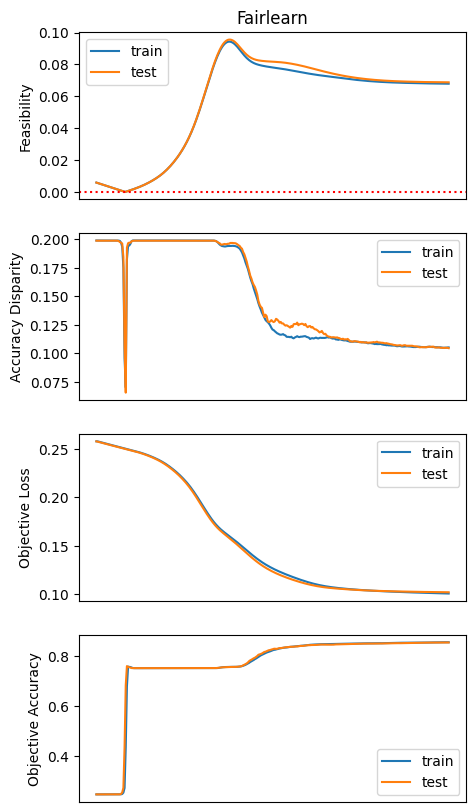

In [7]:
# set up a figure and axes for the plot
fig, axes = plt.subplots(4, 1, figsize=(5, 10))
axes = axes.flatten()

# Plot the constraints
ax1 = axes[0]
constraint_df.plot(ax=ax1)

# Plot the r line
r = float(data_dir.split('.')[0].split('_')[-1])
ax1.axhline(r, color='red', linestyle='dotted')

# axis config
ax1.set_xticks([])
ax1.set_ylabel('Feasibility')
ax1.set_title('Fairlearn')

# Plot the accuracy disparity
ax2 = axes[1]
acc_disp_df.plot(ax=ax2)

# axis config
ax2.set_xticks([])
ax2.set_ylabel('Accuracy Disparity')

# Plot the objective values
ax3 = axes[2]
obj_df.plot(ax=ax3)

# axis config
ax3.set_xticks([])
ax3.set_ylabel('Objective Loss')

# Plot the accuracy
ax4 = axes[3]
acc_df.plot(ax=ax4)

# axis config
ax4.set_xticks([])
ax4.set_ylabel('Objective Accuracy')